In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(pROC))

In [2]:
df_obs <- suppressMessages(read_csv('data.csv')) %>% 
  transmute(x_hours = Hours,
            y_pass = Pass) 

In [3]:
model_fit <- glm(y_pass ~ x_hours,df_obs,family = 'binomial')

coef(model_fit)

(Intercept)     x_hours 
  -4.077713    1.504645

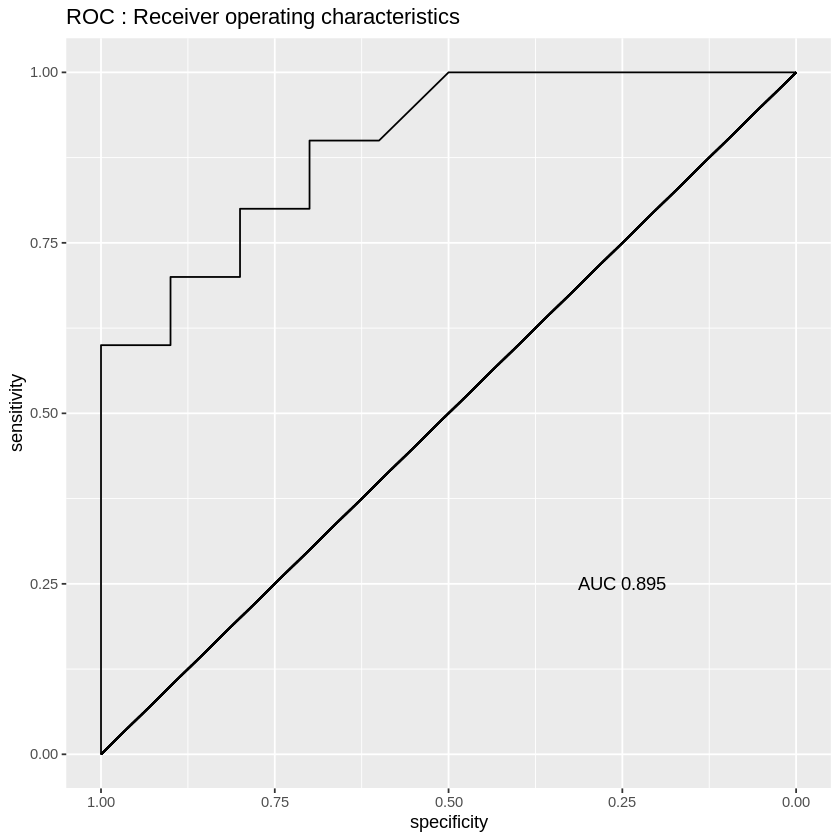

In [4]:
y_predict <- predict(model_fit, type = 'response')

plot_roc <- roc(df_obs$y_pass ~ y_predict, plot = FALSE, print.auc = TRUE, quiet = TRUE)

roc_auc <- auc(plot_roc)

ggroc_plot <- ggroc(plot_roc) + 
  ggtitle('ROC : Receiver operating characteristics') +
  geom_segment(aes(x = 1, xend = 0, y = 0, yend = 1)) +
  annotate("text", label = paste("AUC",roc_auc), x = 0.25, y =0.25)

ggroc_plot